# ***SMART LICENSE PLATE RECOGNITION SYSTEM***

**Yusuf Taha Öncü**


# **Our Motivation :**
*In this project, we aimed to address an issue that is inseparable from our daily lives. Especially in car-centered cities like Istanbul, it is crucial for such technologies to help maintain order. Our motivation is to create solutions that unleash our inner productivity and that is exactly what the The Smart License Plate Recognition System is all about.*

# **Explanation :**
*This code is designed to detect and recognize license plates in uploaded images using Optical Character Recognition (OCR) technology. It utilizes the EasyOCR library for text recognition and OpenCV for image processing and visualization. Users can upload multiple images, each of which is processed by first displaying the original image, then detecting text regions (such as license plates) with a confidence score above a certain threshold. These regions are highlighted with bounding boxes and labeled with the recognized text. Finally, the recognized plate numbers are shown both on the image and as printed output.*


Saving Example1.jpeg to Example1.jpeg
Saving Example2.jpeg to Example2.jpeg
Saving Example3.jpeg to Example3.jpeg

--- Example1.jpeg Image Processing ---


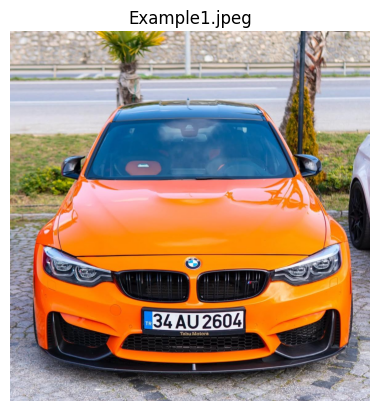


OCR Sonuçları:


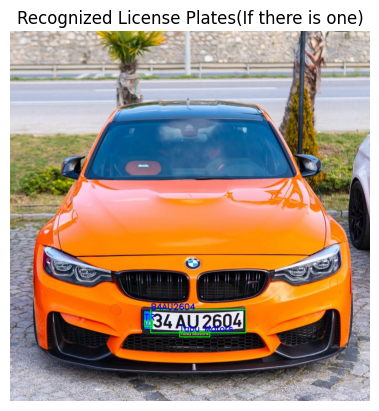

Recognized Plates:
→ TR
→ B4AU2604
→ Tabu Motors

--- Example2.jpeg Image Processing ---


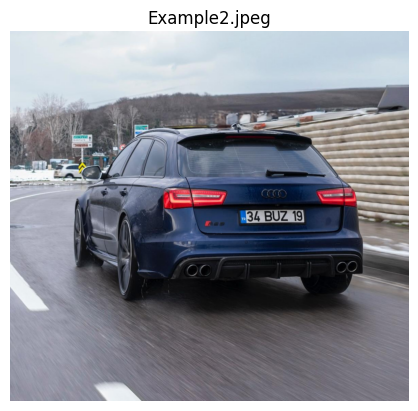


OCR Sonuçları:


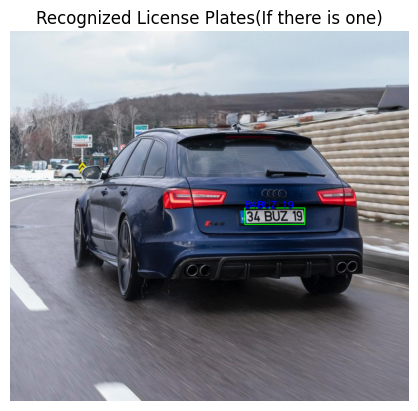

Recognized Plates:
→ B4BUZ 19

--- Example3.jpeg Image Processing ---


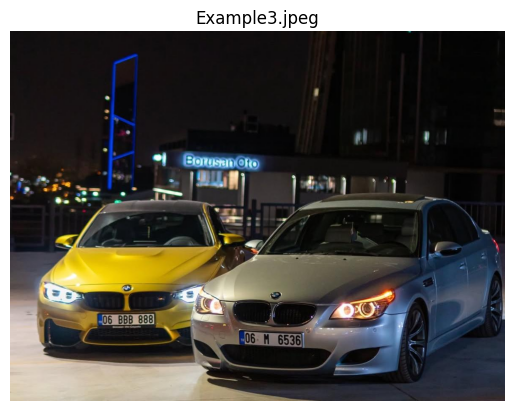


OCR Sonuçları:


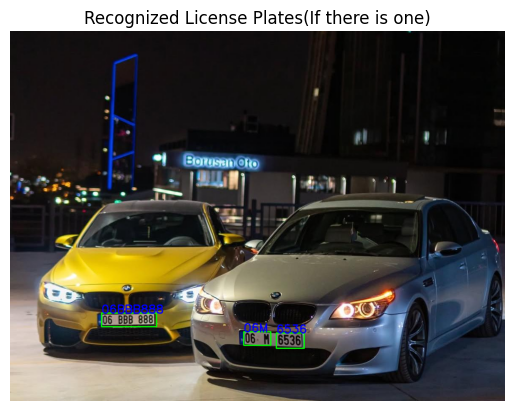

Recognized Plates:
→ 06BBB888
→ 06M
→ 6536


In [15]:
# Download required libraries
!pip install easyocr opencv-python-headless matplotlib

# 1. Load the files
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import easyocr

# Ask user to enter multiple files
uploaded = files.upload()

# Start the EasyOCR module
reader = easyocr.Reader(['en'])

# Execute all functions for all images
for image_path in uploaded.keys():
    print(f"\n--- {image_path} Image Processing ---")

    # Reading the image and displaying it
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'{image_path}')
    plt.show()

    # 3. OCR (Plate Recognation)
    results = reader.readtext(image)

    print("\nOCR Sonuçları:")
    detected_plates = []

    # 4. Mark the license plate area
    image_with_boxes = image.copy()

    for (bbox, text, prob) in results:
        if prob > 0.4:  # If enough probabilty is met with the requirements
            detected_plates.append(text)

            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))

            # Draw the box
            cv2.rectangle(image_with_boxes, top_left, bottom_right, (0, 255, 0), 2)

            # Write the text
            cv2.putText(image_with_boxes, text, top_left, cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (255, 0, 0), 2)

    # Show the result image
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Recognized License Plates(If there is one)")
    plt.show()

    # Display the recognized license plate text
    if detected_plates:
        print("Recognized Plates:")
        for plate in detected_plates:
            print(f"→ {plate}")
    else:
        print("No recognation of license plate ")